In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [3]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [4]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('&', '')

In [5]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                314 non-null    object
 1   Infosys             314 non-null    int64 
 2   Indian_Hotel        314 non-null    int64 
 3   Mahindra__Mahindra  314 non-null    int64 
 4   Axis_Bank           314 non-null    int64 
 5   SAIL                314 non-null    int64 
 6   Shree_Cement        314 non-null    int64 
 7   Sun_Pharma          314 non-null    int64 
 8   Jindal_Steel        314 non-null    int64 
 9   Idea_Vodafone       314 non-null    int64 
 10  Jet_Airways         314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [6]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [7]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


In [8]:
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]

In [9]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-07-04,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243


In [10]:
stock_prices.tail()

,Date,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,2020-02-03,729,120,469,658,33,23110,401,146,3,22
310,2020-09-03,634,114,427,569,30,21308,384,121,6,18
311,2020-03-16,577,90,321,428,27,18904,365,105,3,16
312,2020-03-23,644,75,293,360,21,17666,338,89,3,14
313,2020-03-30,633,75,284,379,23,17546,352,82,3,14


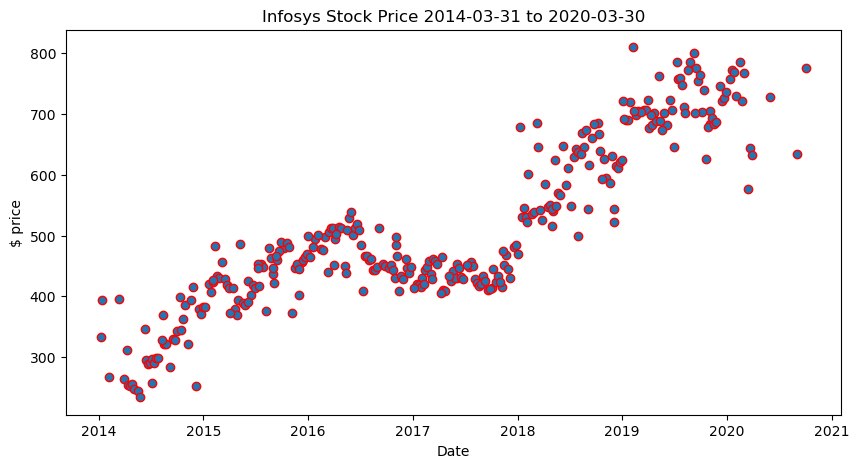

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Infosys'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Infosys Stock Price 2014-03-31 to 2020-03-30")
plt.show()

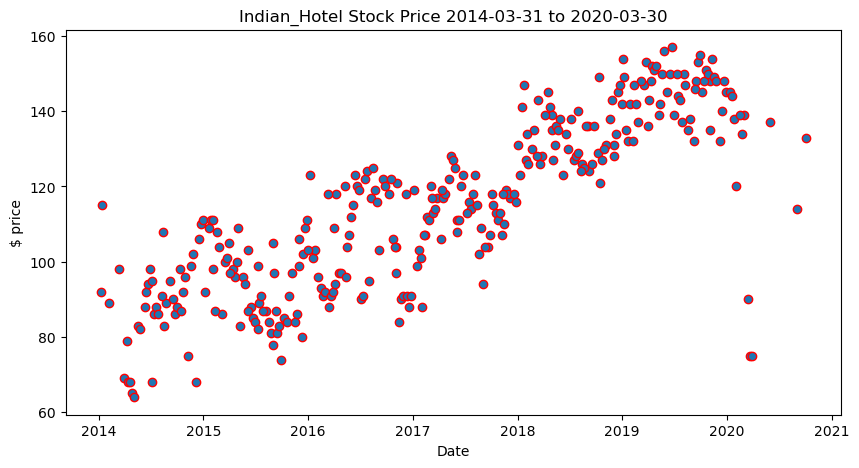

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Indian_Hotel'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Indian_Hotel Stock Price 2014-03-31 to 2020-03-30")
plt.show()

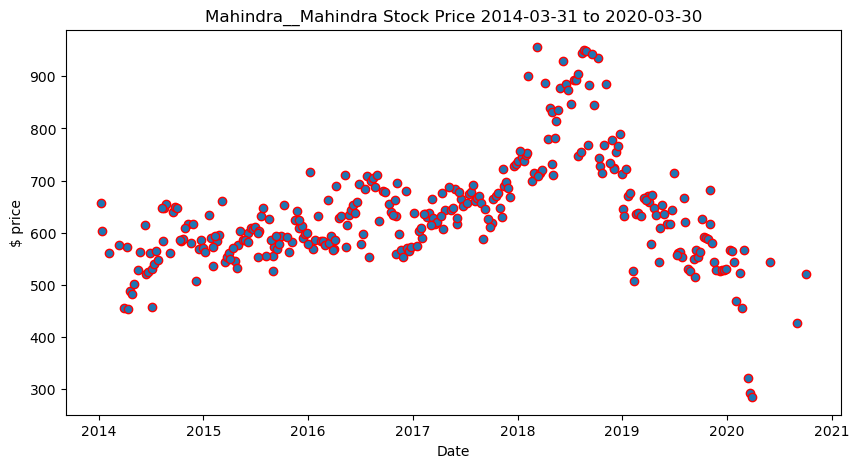

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Mahindra__Mahindra'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Mahindra__Mahindra Stock Price 2014-03-31 to 2020-03-30")
plt.show()

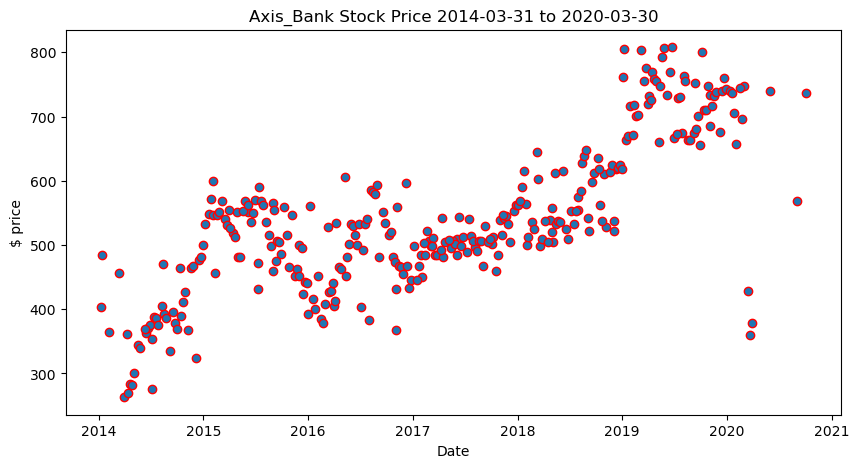

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Axis_Bank'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Axis_Bank Stock Price 2014-03-31 to 2020-03-30")
plt.show()

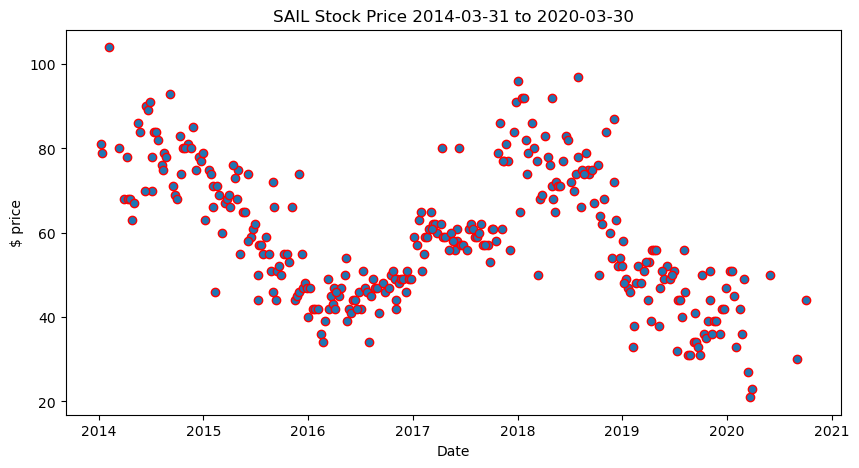

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['SAIL'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("SAIL Stock Price 2014-03-31 to 2020-03-30")
plt.show()

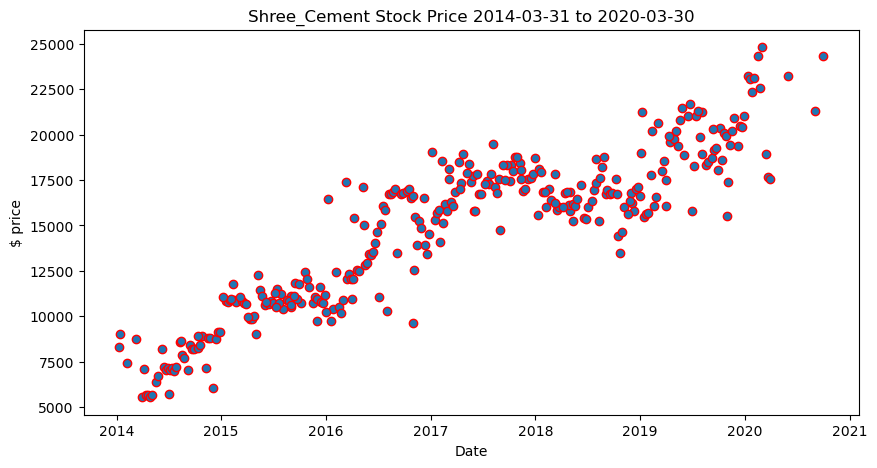

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Shree_Cement'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Shree_Cement Stock Price 2014-03-31 to 2020-03-30")
plt.show()

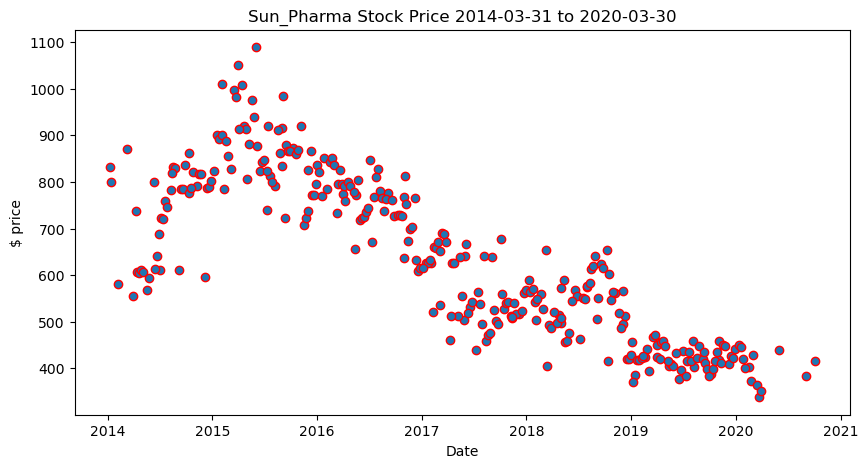

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Sun_Pharma'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Sun_Pharma Stock Price 2014-03-31 to 2020-03-30")
plt.show()

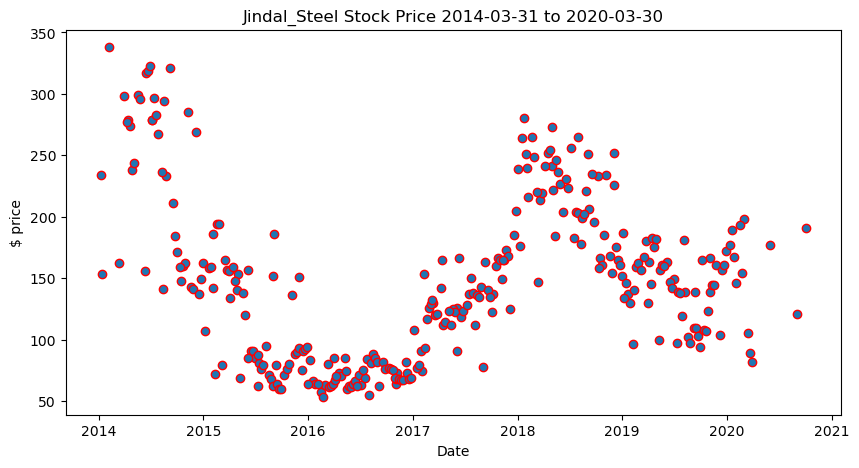

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Jindal_Steel'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Jindal_Steel Stock Price 2014-03-31 to 2020-03-30")
plt.show()

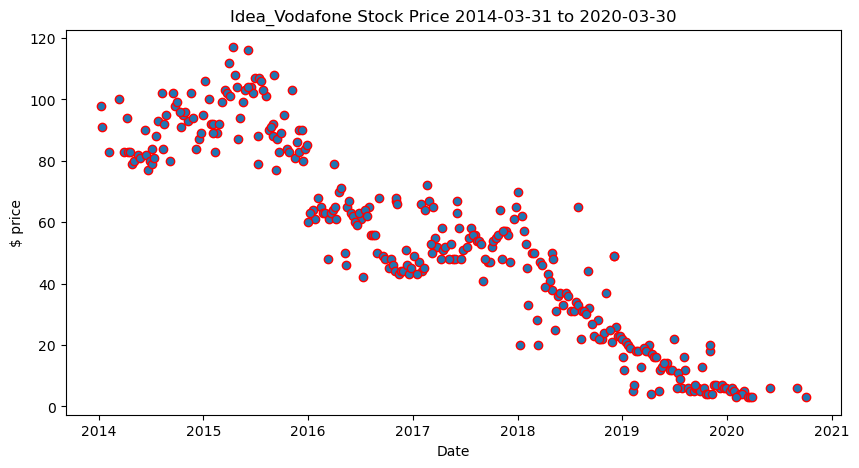

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Idea_Vodafone'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Idea_Vodafone Stock Price 2014-03-31 to 2020-03-30")
plt.show()

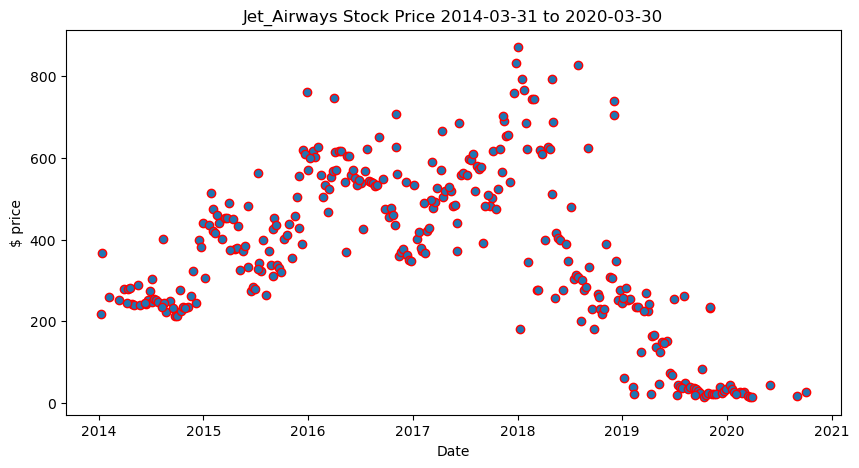

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Jet_Airways'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Jet_Airways Stock Price 2014-03-31 to 2020-03-30")
plt.show()

In [21]:
stock_returns = np.log(stock_prices.drop(['Date'],axis=1)).diff(axis = 0, periods = 1)

In [22]:
stock_returns.shape

(314, 10)

In [23]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra__Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [24]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys               0.002794
Indian_Hotel          0.000266
Mahindra__Mahindra   -0.001506
Axis_Bank             0.001167
SAIL                 -0.003463
Shree_Cement          0.003681
Sun_Pharma           -0.001455
Jindal_Steel         -0.004123
Idea_Vodafone        -0.010608
Jet_Airways          -0.009548
dtype: float64

In [25]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys               0.035070
Indian_Hotel          0.047131
Mahindra__Mahindra    0.040169
Axis_Bank             0.045828
SAIL                  0.062188
Shree_Cement          0.039917
Sun_Pharma            0.045033
Jindal_Steel          0.075108
Idea_Vodafone         0.104315
Jet_Airways           0.097972
dtype: float64

In [26]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra__Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


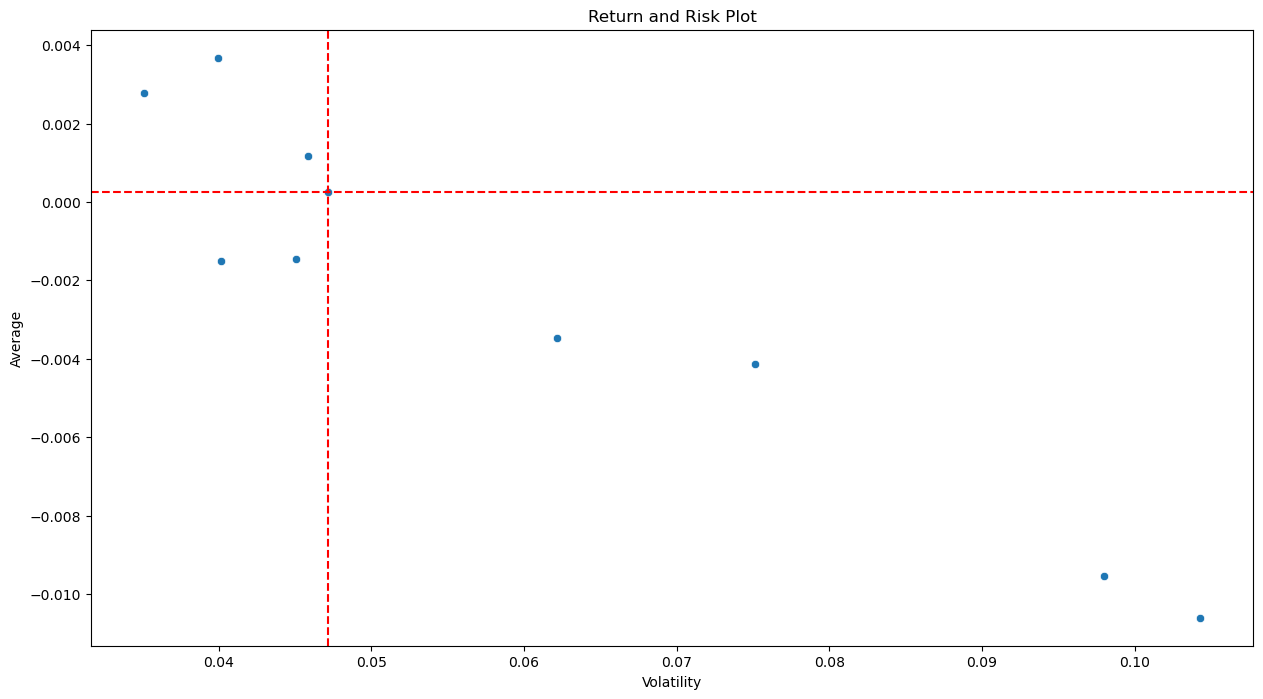

In [27]:
plt.figure(figsize = (15, 8))
plot = sns.scatterplot(x=df['Volatility'],y=df['Average'])
plot.axvline(x=0.047131,linestyle='--', color = "red")
plot.axhline(y=0.000266,linestyle='--', color = "red")
plt.title("Return and Risk Plot")
plt.show()

In [28]:
df.sort_values(by = 'Average',ascending = False)

,Average,Volatility
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
Sun_Pharma,-0.001455,0.045033
Mahindra__Mahindra,-0.001506,0.040169
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315
